In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [67]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

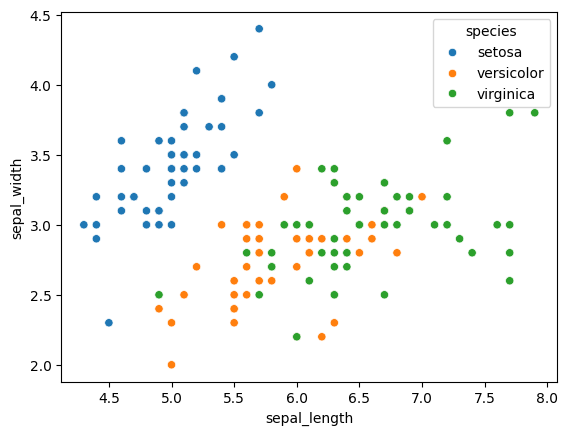

In [68]:
# plot the data
sns.scatterplot(x= 'sepal_length', y= 'sepal_width', hue= 'species', data= df)

In [69]:
# split the data X and y
X = df.drop('species', axis=1)
y= df['species']

# encode the target variables
le = LabelEncoder()
y = le.fit_transform(y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [70]:
%%time
# train the decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# prediction
y_pred= dt.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print('f1_score:', f1_score(y_test, y_pred, average='micro'))
print('confusion_matrix: \n', confusion_matrix(y_test, y_pred))
print('classification_report:', classification_report(y_test, y_pred))



Accuracy Score: 0.9333333333333333
Precision Score: 0.9333333333333333
Recall Score: 0.9333333333333333
f1_score: 0.9333333333333333
confusion_matrix: 
 [[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

CPU times: total: 62.5 ms
Wall time: 56.4 ms


In [71]:
%%time
# bagging alogorithm:
# train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# prediction
y_pred = rf.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print('f1_score:', f1_score(y_test, y_pred, average='micro'))

Accuracy Score: 0.9333333333333333
Precision Score: 0.9333333333333333
Recall Score: 0.9333333333333333
f1_score: 0.9333333333333333
CPU times: total: 297 ms
Wall time: 447 ms


In [72]:
%%time
# train the xgboost model
xgb= XGBClassifier()
xgb.fit(X_train, y_train)

# prediction
y_pred = xgb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average='micro'))
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print('f1_score:', f1_score(y_test, y_pred, average='micro'))

Accuracy Score: 0.9333333333333333
Precision Score: 0.9333333333333333
Recall Score: 0.9333333333333333
f1_score: 0.9333333333333333
CPU times: total: 93.8 ms
Wall time: 330 ms


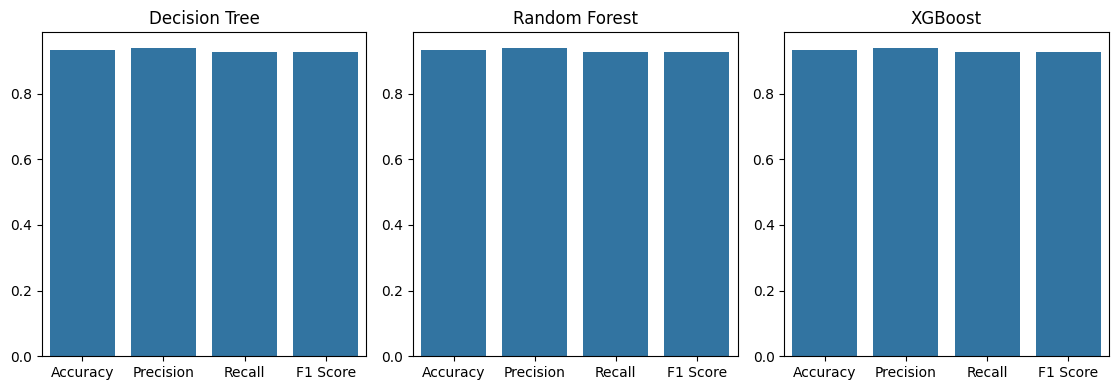

In [81]:
# male a barplot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x= ['Accuracy', 'Precision', 'Recall', 'F1 Score'], y= [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x= ['Accuracy', 'Precision', 'Recall', 'F1 Score'], y= [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x= ['Accuracy', 'Precision', 'Recall', 'F1 Score'], y= [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')])
plt.title('XGBoost')
plt.tight_layout()
plt.show()


In [82]:
df.shape

(150, 5)

# Big dataset in apply decision tree, random forest, xgboost


In [ ]:
# encode the data
# this apply in diamond dataset 
le = LabelEncoder()
X['color']= le.fit_transform(X['color'])
X['clarity']= le.fit_transform(X['clarity'])

#encode the target variable
y = le.fit_transform(y)